# Исследование объявлений о продаже квартир. Собираем insights для бизнеса

**Набор данных:** данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Моя задача:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости

## Изучаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('real_estate_data.csv',  sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#общая информация о data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы видим, что в данных есть пропуски, например, ceiling_height или floors_total. Также мы видим, какие типы данных представлены для работы - это целые числа, float, булевые значения, а также переменные типа object.

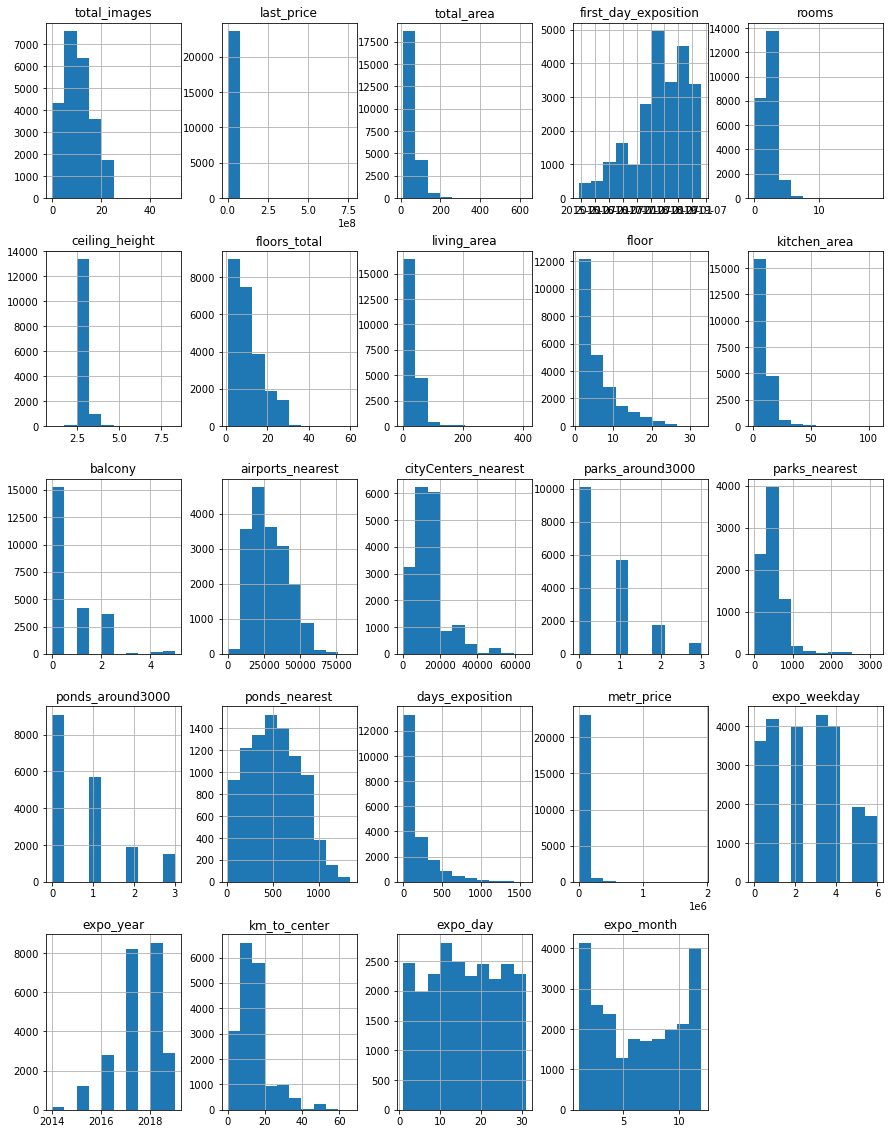

In [66]:
#графики для числовых переменных
data.hist(figsize=(15, 20));

Гистограммы показывают, что переменные имеют различное распределение, какие-то из них имеют высокую однородность (например, last_price или ceiling_height), а другие неоднородны (например, ponds_nearest или airports_nearest)

### Предобработка данных

In [5]:
#посчитаем пропуски в данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть по переменным: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name,airports_nearest,  cityCenters_nearest, parks_around3000, ponds_around3000, ponds_nearest, days_exposition

Пропуски по is_apartment пожно заменить на False, поскольку скорее всего, если ничего не указано, то это не апартаменты. 

In [6]:
data.loc[:, 'is_apartment'] = data.loc[:, 'is_apartment'].fillna(False)

Если наличие балкона не указано, значит скорее всего его нет, заполним пропуски по balcony нулями

In [7]:
data['balcony'] = data['balcony'].fillna(0)

Остальные переменные с пропусками я оставлю без изменений, поскольку замена пропусков в них может исказить данные, ведь виды построек очень вариативны,в том числе в зависимости от локации (центр города или сельская местность будут иметь различный характер застройки), заполнение числовых переменных средними или медианными значениями здесь не совсем корректно.

Пропуски по total_area, living_are и kitchen_area могли бы быть посчитаны, если бы total_area = living_are + kitchen_area, однако на данных без пропусков по всем трем показателям это равенство не выполняется, значит я оставлю их без изменений

В целом, наличие пропусков здесь связана в большей степени с человеческим фактором: некоторые данные авторы объявлений могут считать не важными для заполнения, другие переменные могут получать пропуски ввиду отсутствия какой-либо характеристики у помещения.

#### Рассмотрите типы данных в каждом столбце:
 
Найдем столбцы, в которых нужно изменить тип данных.
Преобразуем тип данных в выбранных столбцах.

- last_price - заменим float на int, тк копейки в объявлениях не указывают
- balcony, parks_around3000, ponds_around3000,days_exposition  - заменим float на int, тк их количество не может быть нецелым
- airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - можно заменить на целые, то есть, по сути, округлить до метров, потому что сантиметры не так важны
- first_day_exposition - заменим формат на datetime, чтобы можно было работать со временем


In [8]:
data['last_price'] = data['last_price'].astype('Int64')

In [9]:
list_to_replace = ['balcony', 'parks_around3000', 
                   'ponds_around3000','days_exposition',
                   'airports_nearest', 'cityCenters_nearest',
                   'parks_nearest', 'ponds_nearest']
for var in list_to_replace:
    data[var]= data[var].astype('Int64', errors = 'ignore')

In [10]:
#замена типа переменной first_day_exposition
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты. 

Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Мы можем заменить названия в существующем столбце или создать новый с названиями без дубликатов.

Заменим 'посёлок', 'поселок городского типа' и 'городской поселок' на 'поселок'

In [11]:
data['locality_new'] = data['locality_name'].apply(lambda x: str(x).replace('посёлок', 'поселок'))

In [12]:
data['locality_new'] = data['locality_new'].apply(lambda x: str(x).replace('поселок городского типа', 'поселок'))

In [13]:
data['locality_new'] = data['locality_new'].apply(lambda x: str(x).replace('городской поселок', 'поселок'))

Остались "Мурино" и "поселок Мурино", "Кудрово" и "деревня Кудрово". Удалим подстроки "поселок" и "деревня": чтобы остались только названия локаций.

In [14]:
def drop_extra(string):
    if 'поселок' in string:
        string = string.replace('поселок ', '')
        return string
    elif 'деревня' in string:
        string = string.replace('деревня ', '')
        return string
    else:
        return string

In [15]:
data['locality_new'] = data['locality_new'].apply(drop_extra)

In [16]:
data['locality_new'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'садовое товарищество Новая Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Красное Село',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет',
       'Сланцы', 'село Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'село Павлово', 'Оредеж', 'село Копорье', 'Молодёжное',
       'Тихвин', 'Победа', 'Нурма', 'Синявино', 

In [17]:
len(data['locality_new'].unique())

314

In [18]:
len(data['locality_name'].unique())

365

Таким образом, нам удалось избавиться от 51 неявных дубликатов

#### Найдем и устраним редкие и выбивающиеся значения.

Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуем обработать аномалии в этом и других столбцах.


In [19]:
#посмотрим на общие характеристики каждой переменной, чтобы найти аномалии
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [20]:
#обратимся к самой болшой кухне в выборке, чтобы понять, нет ли здесь ошибкм
data[data['kitchen_area']==112]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_new
19540,8,420000000,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,...,0,Санкт-Петербург,30706,7877,0,<NA>,2,318,106.0,Санкт-Петербург


Квартира с общей площадью 900 м2 и кухней в 112 м2 выглядит сильно отличающейся от других представителей выборки, удалим это наблюдение как аномальное

In [21]:
data = data[data['kitchen_area']!=112]

In [22]:
#добавим новые индексы после удаления одного наблюдения
data = data.reset_index(drop=True)

Наиболее подозрительно выглядит переменная ceiling_height, где максимальная высота потолка- 100 м. Рассмотрим эту переменную и попробуем избавиться от аномалии

<AxesSubplot:>

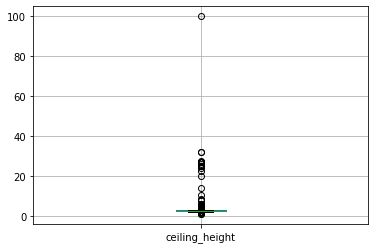

In [23]:
data.boxplot('ceiling_height')

75% значений переменной высоты потолков находятся до 2,8 метров. Если смотреть на боксплот, то потолки выше 10 метров встречаются реже, чем основная масса наблюдений, а после 20 метров возникают пики - скорее всего, это потолки в 2, 2,5 метров с искаженными значениями. 

In [24]:
#Для начала избавимся от аномального 100 метрового потолка. даже если мы его разделим на 10, все равно получится слишком много, так что лучше его убрать. 
data['ceiling_height']= data.loc[data['ceiling_height']!=100, 'ceiling_height']
data['ceiling_height'].describe()

count    14502.000000
mean         2.764792
std          0.968774
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

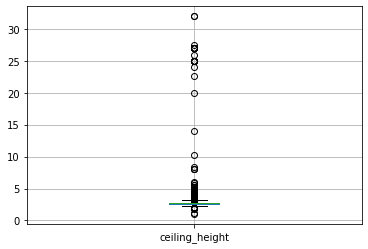

In [25]:
data.boxplot('ceiling_height')

Минимальная высота потолков в выборке - 1 метр - мало, но, возможно, это какие-то спец помещения или капсулы для сна. 1 метр будем считать адекватным минимальным значением, поэтому удалять аномалии будем для наблюдений с высотой потолка в 10 метров и больше.

In [26]:
data.loc[data['ceiling_height']>10, 'ceiling_height'] = data.loc[data['ceiling_height']>10, 'ceiling_height']/10

### Решаем задачу: посчитайте и добавьте в таблицу новые столбцы

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [27]:
# добавим цену одного квадратного метра
data['metr_price'] = (data['last_price']/data['total_area']).astype(float).round().round(0)
data['metr_price'].head(10)

0    120370.0
1     82921.0
2     92786.0
3    408176.0
4    100000.0
5     95066.0
6     99196.0
7    110545.0
8     87455.0
9     88525.0
Name: metr_price, dtype: float64

In [28]:
# добавим день недели публикации
data['expo_weekday'] = data['first_day_exposition'].dt.dayofweek

In [29]:
#добавим год публикации объявления
data['expo_year'] = data['first_day_exposition'].dt.year

In [30]:
#тип этажа квартиры (значения — «‎первый», «последний», «другой»);
data['floor_type'] = 0 #создаем столбец 'floor_type'

for i in range(len(data)):
    if data['floor'][i] == 1:
        data['floor_type'][i] = 'первый'
    elif data['floor'][i] == data['floors_total'][i]:
        data['floor_type'][i] = 'последний'
    else:
        data['floor_type'][i] ='другой'

In [31]:
# расстояние до центра города в километрах
data['km_to_center'] = (data['cityCenters_nearest']/1000).astype(float).round(0)
data[['cityCenters_nearest', 'km_to_center']].head()

,cityCenters_nearest,km_to_center
0,16028,16.0
1,18603,19.0
2,13933,14.0
3,6800,7.0
4,8098,8.0


In [32]:
# в следующем задании нужны день и месяц публикации, добавим их
data['expo_day'] = data['first_day_exposition'].dt.day
data['expo_month'] = data['first_day_exposition'].dt.month
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_new,metr_price,expo_weekday,expo_year,floor_type,km_to_center,expo_day,expo_month
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,755,NaN,Санкт-Петербург,120370.0,3,2019,другой,16.0,7,3
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,<NA>,81.0,Шушары,82921.0,1,2018,первый,19.0,4,12
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,574,558.0,Санкт-Петербург,92786.0,3,2015,другой,14.0,20,8
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,234,424.0,Санкт-Петербург,408176.0,4,2015,другой,7.0,24,7
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,48,121.0,Санкт-Петербург,100000.0,1,2018,другой,8.0,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,381,NaN,Санкт-Петербург,72491.0,1,2017,другой,4.0,21,3
23694,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,<NA>,45.0,Тосно,52542.0,0,2018,другой,NaN,15,1
23695,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,<NA>,NaN,село Рождествено,44092.0,6,2018,первый,NaN,11,2
23696,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,196,602.0,Санкт-Петербург,149511.0,1,2017,другой,10.0,28,3


### Решаем задачу: Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:
 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

<AxesSubplot:>

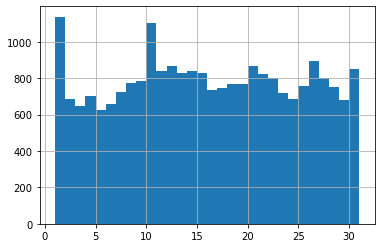

In [34]:
data['expo_day'].hist(bins=30)

<AxesSubplot:>

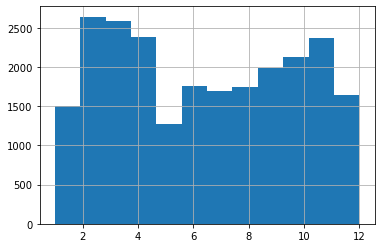

In [35]:
data['expo_month'].hist(bins=12, range = (1,12))

<AxesSubplot:>

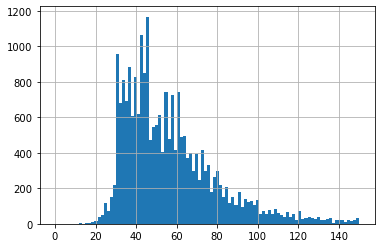

In [36]:
data['total_area'].hist(bins = 100, range = (0, 150))

В основном общая площадь, выставленных на продажу квартир, находятся в пределах 30-50 м2.

<AxesSubplot:>

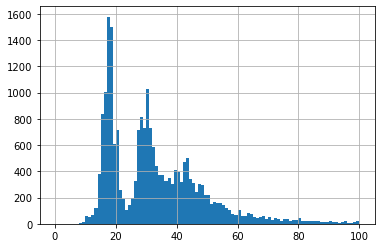

In [37]:
data['living_area'].hist(bins = 100, range = (0, 100))

В основном жилая площадь, выставленных на продажу квартир, находятся в пределах 15-20 м2 и 25-35 м2.

<AxesSubplot:>

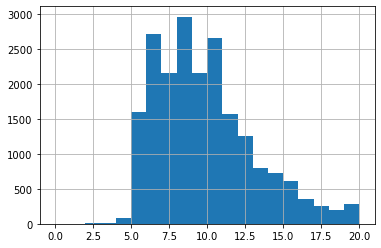

In [38]:
data['kitchen_area'].hist(bins = 20, range = (0, 20))

В основном площадь кухни, выставленных на продажу квартир, находятся в пределах 5-12 м2. Большинство кухонь около 8,5 м2

<AxesSubplot:>

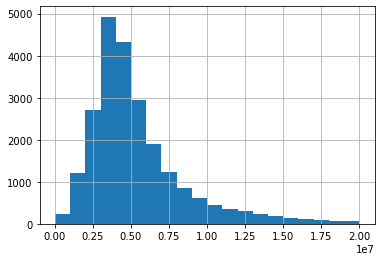

In [39]:
data['last_price'].hist(bins = 20, range = (10000, 20000000))

В основном цены выставленных на продажу квартир находятся в пределах 2 млн. - 7,5 млн.

<AxesSubplot:>

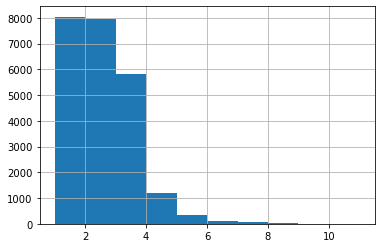

In [40]:
data['rooms'].hist(bins = 10, range = (1, 11))

В основном в выставленных на продажу квартирах 1 или 2 комнаты, однушек чуть больше. На третьем месте по распространенности - трехкомнатные квартиры

<AxesSubplot:>

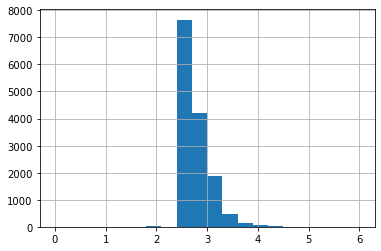

In [41]:
data['ceiling_height'].hist(bins = 20, range = (0, 6))

В основном высота потолков в выставленных на продажу квартирах 2,5-3 метра

<AxesSubplot:>

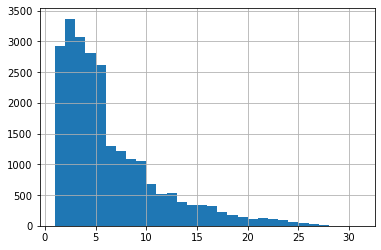

In [42]:
data['floor'].hist(bins = 30, range=(1,31))

Больше всего на продажу выставлено квартир на 2 и 3 этажах. В целом, больше всего объявлений о продаже квартир на 1-5 этажах

<AxesSubplot:>

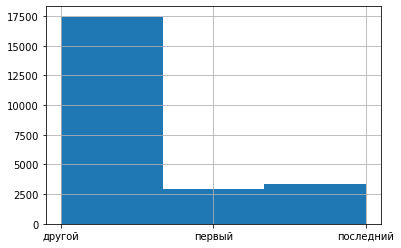

In [43]:
data['floor_type'].hist(bins = 3)

В основном на продаже выставлены квартиры, расположенные между первым и последним этажом. Это логично, потому что первых и последних этажей в домах меньше, чем тех, что попадают в категорию "другие" этажи

<AxesSubplot:>

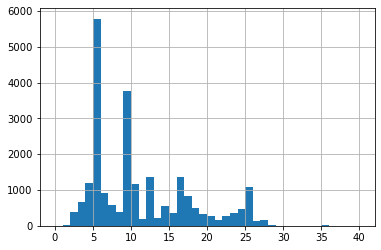

In [44]:
data['floors_total'].hist(bins = 40,range = (0,40))

Большинство объектов недвижимости, выставленных на продажу, расположены в пятиэтажках и девятиэтажках

<AxesSubplot:>

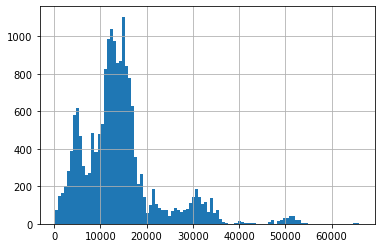

In [45]:
data['cityCenters_nearest'].hist(bins = 100)

Большинство объектов недвижимости, выставленных на продажу, расположены на расстоянии 5-20 км от центра

<AxesSubplot:>

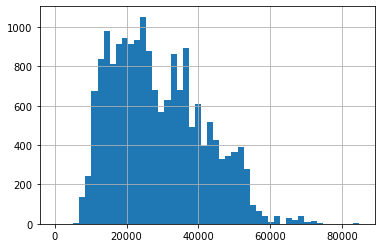

In [46]:
data['airports_nearest'].hist(bins = 50)

Большинство объектов недвижимости, для которых указана удаленность от аэропорта, расположены на растоянии 10-30 км от аэропорта

<AxesSubplot:>

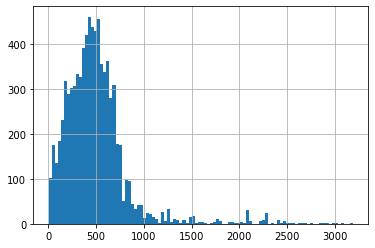

In [47]:
data['parks_nearest'].hist(bins = 100)

Если удаленность от парка указана, то, парк расположен до 1км от недвижимости

Выводы по графикам:
  
- переменные - общая жил площадь и площадь кухни имеют похожее распределение
- на продажу выставлены по большей части квартиры на нижних этажах (до 5) в домах, в которых до 20 этажей 
- на продажу выставлены по большей части квартиры с удаленностью от центра в 10-20 км
- больше всего объявлений публикуется 1 и 10 числа месяца
- больше всего объявлений публикуется в феврале, марте и апреле, затем оно снижается и достигает минималього количества объявлений в мае.
    Все лето количество объявлений примерно одинаковое, и осенью начинает расти. Меньше объявлений становится к новому году (в декабре-январе)
    
Другие интересные наблюдения: 
- В основном общая площадь, выставленных на продажу квартир, находятся в пределах 30-50 м2.
- В основном жилая площадь, выставленных на продажу квартир, находятся в пределах 15-20 м2 и 25-35 м2.
- В основном площадь кухни, выставленных на продажу квартир, находятся в пределах 5-12 м2. Большинство кухонь около 8,5 м2
- В основном цены выставленных на продажу квартир находятся в пределах 2 млн. - 7,5 млн.
- В основном в выставленных на продажу квартирах 1 или 2 комнаты, однушек чуть больше. На третьем месте по распространенности - трехкомнатные квартиры
- В основном высота потолков в выставленных на продажу квартирах 2,5-3 метра
- Больше всего на продажу выставлено квартир на 2 и 3 этажах. В целом, больше всего объявлений о продаже квартир на 1-5 этажах
- В основном на продаже выставлены квартиры, расположенные между первым и последним этажом. Это логично, потому что первых и последних этажей в домах меньше, чем тех, что попадают в категорию "другие" этажи
- Большинство объектов недвижимости, выставленных на продажу, расположены в пятиэтажках и девятиэтажках
- Большинство объектов недвижимости, выставленных на продажу, расположены на расстоянии 5-20 км от центра
- Большинство объектов недвижимости, для которых указана удаленность от аэропорта, расположены на растоянии 10-30 км от аэропорта
- Если удаленность от парка указана, то, парк расположен до 1км от недвижимости


#### Изучите, как быстро продавались квартиры (столбец days_exposition). 

Этот параметр показывает, сколько дней было размещено каждое объявление. 
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

<AxesSubplot:>

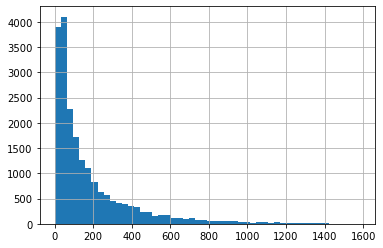

In [48]:
#шистограмма по кличеству дней размещения объявлений
data['days_exposition'].hist(bins = 50)

In [49]:
#числовые показатели распределения переменной по кличеству дней размещения объявлений
data['days_exposition'].describe()

count    20517.000000
mean       180.892284
std        219.732721
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

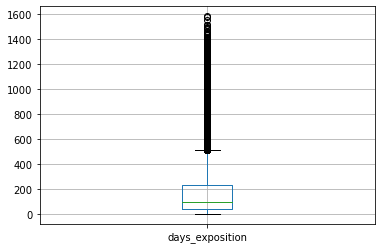

In [50]:
data.boxplot('days_exposition')

In [51]:
#Верхняя граница уса
(232-45)*1.5 + 232

512.5

Обычно продажа квартиры заниамет 45 - 232 дня. Быстрыми можно считать продажи, если они состоялись в 1-44 день публикации объявления. Долгими  можно считать продажи, если они состоялись после 232 день публикации объявления. Слишком долгие продажи - те, что состоялись спустя 512 дней с публикации объявления

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [52]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area',
     'rooms', 'expo_weekday', 'expo_month', 'expo_year']].corr()['last_price']

last_price      1.000000
total_area      0.643149
living_area     0.559258
kitchen_area    0.511200
rooms           0.360350
expo_weekday    0.002126
expo_month      0.000215
expo_year      -0.043880
Name: last_price, dtype: float64

- Математически цена на недвижимость связана с общей площадью квартиры: чем больше площадь, тем больше цена. Аналогично, чем больше жилая площадь и площадь кухни, тем выше цена квартиры.
- Количество комнат в квартире слабо, но связано с ценой: чем больше комнат, тем выше цена
- день недели, месяц и год публикации объявления о продаже недвижимости не связаны со стоимостью недвижимости с т.з корреляции Пирсона, однако это не лучший показатель в данном случае, поскольку шкалы этих переменных скорее псевдо-интервальные

In [53]:
#Для типа этажа не подходит корреляция Пирсона из-за категориаольной шкалы, поэтому посчитаем медианы по каждой подгруппе
data.groupby('floor_type')['last_price'].agg('median')

floor_type
другой       4850000.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: Float64

Самые дешевые квартиры на первом этаже, чуть дороже - на последнем эаже, самые дорогие - между первым и последним.
Получается, тип этажа связан со стоимостью недвижимости.

(0.0, 200.0)

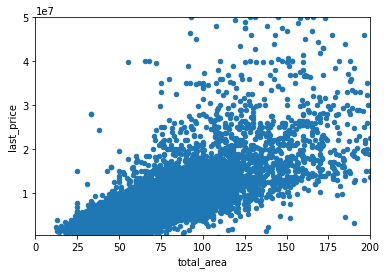

In [55]:
#Зависимость цены от общей площади
data.plot(x= 'total_area' , y = 'last_price', kind = 'scatter')
plt.ylim(500000, 50000000)
plt.xlim(0,200)

Вывод: чем больше общая площадь квартиры, тем выше ее цена

(0.0, 200.0)

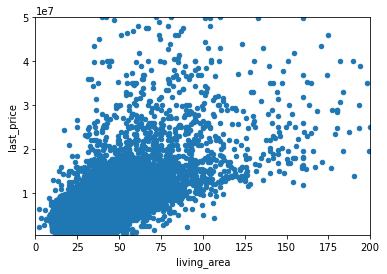

In [56]:
#Зависимость цены от жилой площади
data.plot(x= 'living_area' , y = 'last_price', kind = 'scatter')
plt.ylim(500000, 50000000)
plt.xlim(0,200)

Вывод: чем больше жилая площадь квартиры, тем выше ее цена

(0.0, 100.0)

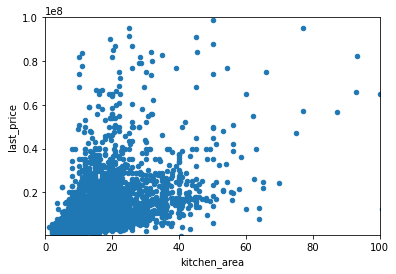

In [57]:
#Зависимость цены от площади кухни
data.plot(x= 'kitchen_area' , y = 'last_price', kind = 'scatter')
plt.ylim(500000, 100000000)
plt.xlim(0,100)

Для переменных общей, жилой и кухонной площади видим то же, что и в таблице корреляции. Связь есть, но данные не укладываются и близко в рисунок линейной функции

<AxesSubplot:xlabel='rooms'>

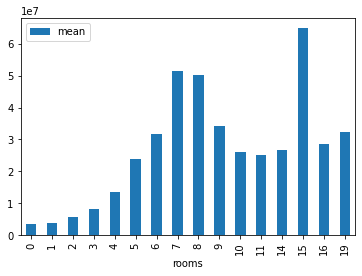

In [58]:
#Зависимость цены от количества комнат
rooms = data.pivot_table(index = 'rooms', values ='last_price', 
                 aggfunc =['count', 'sum'])
rooms.columns = ['count', 'sum']
rooms['mean'] = rooms['sum']/rooms['count']
rooms.plot(y = 'mean', kind = 'bar')

Видим,почему такая небольшая линейная связь получилась в таблице корреляции. Если разделить количество комнат на две группы - 1) до 7 комнат и 2) 7+ компант, то мы видим, что в первой группе линейная связь есть и довольно сильная, однако, если комнат более, чем 7, то их цена сначала снижается, а затем остается примерно одинаковой. То есть, мы можем говорить о связи для случаев, когда комнат 7 и менее. В этом случае, чем больше комнат, тем выше цена

<AxesSubplot:xlabel='expo_weekday'>

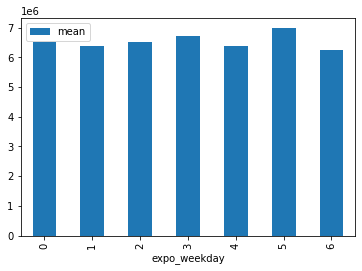

In [59]:
#связь цены с expo_weekday
weekday = data.pivot_table(index = 'expo_weekday', values ='last_price', 
                 aggfunc =['count', 'sum'])
weekday.columns = ['count', 'sum']
weekday['mean'] = weekday['sum']/weekday['count']
weekday.plot(y = 'mean', kind = 'bar')

По графику, цена не связана с днем публикации объявления. Аналогичный результат мы видели математически.

<AxesSubplot:xlabel='expo_month'>

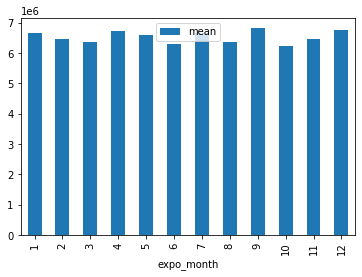

In [60]:
#связь цены с expo_month
expo_month = data.pivot_table(index = 'expo_month', values ='last_price', 
                 aggfunc =['count', 'sum'])
expo_month.columns = ['count', 'sum']
expo_month['mean'] = expo_month['sum']/expo_month['count']
expo_month.plot(y = 'mean', kind = 'bar')

По графику, цена не связана с месяцем публикации объявления. Аналогичный результат мы видели математически.

<AxesSubplot:xlabel='expo_year'>

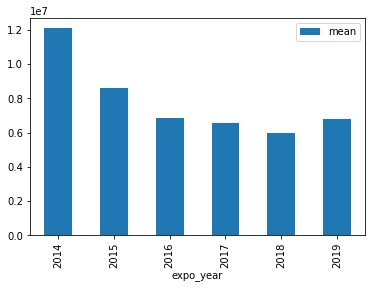

In [61]:
#expo_year
expo_year = data.pivot_table(index = 'expo_year', values ='last_price', 
                 aggfunc =['count', 'sum'])
expo_year.columns = ['count', 'sum']
expo_year['mean'] = expo_year['sum']/expo_year['count']
expo_year.plot(y = 'mean', kind = 'bar')

По графику, цена связана с годом публикации объявления. Чем более новое объявление, тем ниже цена, однако, в 16-19 годах стоимость недвижимости находится примерно на одном уровне, это объясняет, почему математически связи не было обнаружено.

<AxesSubplot:xlabel='floor_type'>

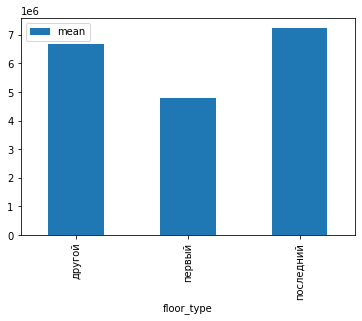

In [62]:
#floor_type

floor_type = data.pivot_table(index = 'floor_type', values ='last_price', 
                 aggfunc =['count', 'sum'])
floor_type.columns = ['count', 'sum']
floor_type['mean'] = floor_type['sum']/floor_type['count']
floor_type.plot(y = 'mean', kind = 'bar')

Есть связь между этажом и стоимостью квартиры: квартиры на первом этаже самые дешевые, а на последнем - самые дорогие

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [63]:
#делаем сводную таблицу по населенным пунктам, aggfunc = count считает кол-во объявлений
places = data.pivot_table(index = 'locality_new', values = 'metr_price', aggfunc = ['median', 'count'])
places.columns = ['median_metr_price', 'N'] #для удобства переименуем колонки

#отберем в отдельную таблицу топ 10 локаций по количеству объявлений
top_10_count = places.sort_values(by= 'N', ascending = False).head(10)
top_10_count.sort_values(by= 'median_metr_price') # выведем таблицу топ 10 объявлений, отсортированную по средней цене м2

,median_metr_price,N
locality_new,,
Выборг,58158.0,237
Всеволожск,65789.0,398
Гатчина,67797.0,307
Колпино,74723.5,338
Шушары,76876.0,440
Мурино,86175.5,590
Парголово,91643.0,327
Кудрово,95675.5,472
Пушкин,100000.0,369


Самая высокая средняя цена квадратного метра в культурной столице - в Санкт-Петербурге (114 826 р.), самая низкая средняя цена за квадратный метр в Выборге (58 141 р.)

#### Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычисляем среднюю цену каждого километра. 


In [64]:
#квартиры в Санкт-Петербурге
spb = data[data['locality_new']=='Санкт-Петербург']

<AxesSubplot:xlabel='km_to_center'>

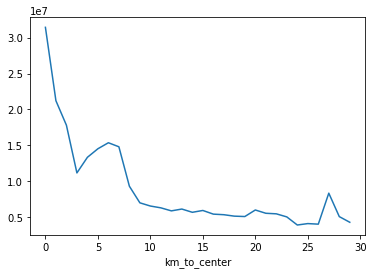

In [65]:
spb.groupby(by='km_to_center')['last_price'].agg('mean').plot(y = 'last_price')

Чем дальше от центра, тем дешевле цена недвижимости. Есть пики на 3-7 км и 26-27. Возможно там расположены отдельные престижные районы, где цена выше, чем в соседних

### Общий вывод

О предложении недвижимости в Санкт-Петербурге: 
- на продажу выставлены по большей части квартиры на нижних этажах (до 5) в домах, в которых до 20 этажей 
- на продажу выставлены по большей части квартиры с удаленностью от центра в 10-20 км
- больше всего объявлений публикуется 1 и 10 числа месяца
- больше всего объявлений публикуется в феврале, марте и апреле, затем оно снижается и достигает минималього количества объявлений в мае. Все лето количество объявлений примерно одинаковое, и осенью начинает расти. Меньше объявлений становится к новому году (в декабре-январе)
- Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Выборг - ТОП 10 локаций по количеству объявлений о продаже недвижимости. Из них самая высокая средняя цена квадратного метра в Санкт-Петербурге, а самая низкая в Выборге.


Сроки продажи:

- Обычно продажа квартиры заниамет 45 - 232 дня. Быстрыми можно считать продажи, если они состоялись в 1-44 день публикации объявления. Долгими  можно считать продажи, если они состоялись после 232 день публикации объявления. Слишком долгие продажи - те, что состоялись спустя 512 дней с публикации объявления


Что влияет на стоимость недвижимости: 

- Наиболее значимый фактор - общая площадь квартиры: чем больше площадь, тем больше цена. Аналогично, чем больше жилая площадь и площадь кухни, тем выше цена.
- Важно и расположение: ближе к центру квартиры дороже,дальше от центра - дешевле.
- Есть связь между этажом и стоимостью квартиры: квартиры на первом этаже самые дешевые, а на последнем - самые дорогие.
- Если рассматривать квартиры с числом до 7 комнат, то для них будет действовать положительная связь между количеством комнат и ценой недвижимости: чем больше комнат, тем выше цена.